In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["XCL1", "XCL2", "KLRC1"]]
initial_gene_marker

,XCL1,XCL2,KLRC1
PS001,0.066899,0.162947,0.204370
PS002,0.044134,0.183664,0.143162
PS003,0.001362,0.001362,0.001362
PS004,0.000094,0.000094,0.016261
PS005,0.000873,0.000873,0.000873
PS006,0.005377,0.005377,0.327993
PS007,0.106621,0.127885,0.051107
PS008,0.002088,0.002088,0.002088
PS009,0.093075,0.002389,0.094360
PS010,0.000651,0.000651,0.147037


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["XCL1", "XCL2", "KLRC1"]]
recurrence_gene_marker

,XCL1,XCL2,KLRC1
PS001,0.028737,0.000176,0.014933
PS002,0.000395,0.095995,0.019802
PS003,0.000429,0.091356,0.037583
PS004,0.064530,0.298999,0.066282
PS005,0.117640,0.001018,0.001018
PS006,0.148157,0.002259,0.086433
PS007,1.557259,2.202577,0.721208
PS008,0.000364,0.098646,0.142051
PS009,0.088411,0.002205,0.119502
PS010,0.373153,0.212165,0.226065


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

,IDH,1p19qcodel
Patient_ID,,
PS001,IDHwt,noncodel
PS002,IDHwt,noncodel
PS003,IDHwt,noncodel
PS004,IDHwt,noncodel
PS005,IDHwt,noncodel
PS006,IDHwt,noncodel
PS007,IDHwt,noncodel
PS008,IDHwt,noncodel
PS009,IDHmut,noncodel


In [10]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,NaN


In [11]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [12]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


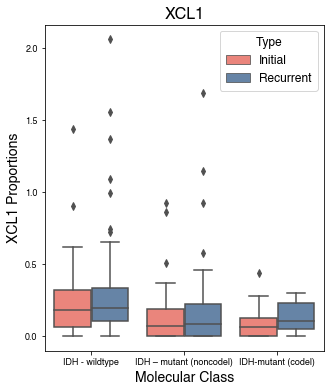

In [13]:
#XCL1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "XCL1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "XCL1"]
recurrence.columns = ['Recurrent']
XCL1_data = initial.join(recurrence)
XCL1_final = pd.concat([class_data, XCL1_data], axis=1)
XCL1_final.index.name = 'Mixture'
XCL1_final = XCL1_final.drop(['IDH','1p19qcodel'], axis=1)
XCL1_final = XCL1_final.sort_values(by='Mixture')
XCL1_mdf = pd.melt(XCL1_final.reset_index(), id_vars=('Mixture','Molecular Class'))

import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("XCL1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=XCL1_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("XCL1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [14]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = XCL1_mdf.loc[XCL1_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.1044859721481102, pvalue=0.2693823853545103)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.594858571597379, pvalue=0.5519380118160698)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.7875808920005398, pvalue=0.07384365056328972)
--------------------------------


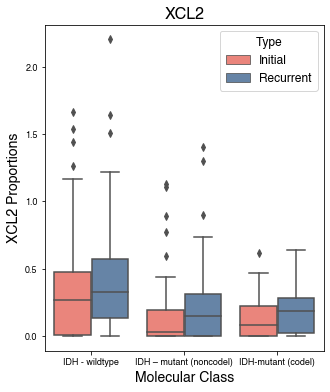

In [15]:
#XCL2
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "XCL2"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "XCL2"]
recurrence.columns = ['Recurrent']
XCL2_data = initial.join(recurrence)
XCL2_final = pd.concat([class_data, XCL2_data], axis=1)
XCL2_final.index.name = 'Mixture'
XCL2_final = XCL2_final.drop(['IDH','1p19qcodel'], axis=1)
XCL2_final = XCL2_final.sort_values(by='Mixture')
XCL2_mdf = pd.melt(XCL2_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("XCL2", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=XCL2_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("XCL2 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [16]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = XCL2_mdf.loc[XCL2_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.2570450562858813, pvalue=0.20873732085340846)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.070627924084866, pvalue=0.03839358053710957)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.0282544953985406, pvalue=0.3038301300878443)
--------------------------------


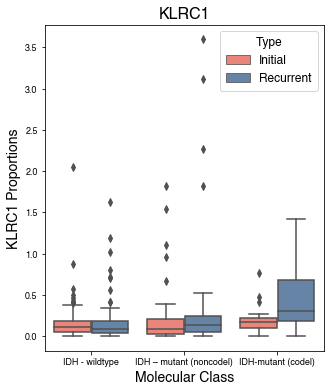

In [17]:
#KLRC1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "KLRC1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "KLRC1"]
recurrence.columns = ['Recurrent']
KLRC1_data = initial.join(recurrence)
KLRC1_final = pd.concat([class_data, KLRC1_data], axis=1)
KLRC1_final.index.name = 'Mixture'
KLRC1_final = KLRC1_final.drop(['IDH','1p19qcodel'], axis=1)
KLRC1_final = KLRC1_final.sort_values(by='Mixture')
KLRC1_mdf = pd.melt(KLRC1_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("KLRC1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=KLRC1_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("KLRC1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [18]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = KLRC1_mdf.loc[KLRC1_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=0.39498173838409234, pvalue=0.6928563651961799)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.127955870733828, pvalue=0.25933855643662285)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.183063390230748, pvalue=0.029031142135425327)
--------------------------------
